# Real Estate Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
data = pd.read_excel('real_estate_data.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.shape

(414, 8)

In [4]:
# Making columns clear
data = data.rename({'X1 transaction date':'Transaction Date',
                    'X2 house age':'Age',
                    'X3 distance to the nearest MRT station':'Distance to station',
                    'X4 number of convenience stores':'Stores',
                    'X5 latitude':'Latitude',
                    'X6 longitude':'Longitude',
                    'Y house price of unit area': 'Price'}, axis=1)
data.head()

,No,Transaction Date,Age,Distance to station,Stores,Latitude,Longitude,Price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.info()  # There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   414 non-null    int64  
 1   Transaction Date     414 non-null    float64
 2   Age                  414 non-null    float64
 3   Distance to station  414 non-null    float64
 4   Stores               414 non-null    int64  
 5   Latitude             414 non-null    float64
 6   Longitude            414 non-null    float64
 7   Price                414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.describe()

,No,Transaction Date,Age,Distance to station,Stores,Latitude,Longitude,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# We drop the 'No' columns 

data = data.drop('No', axis=1)

## Data Exploration

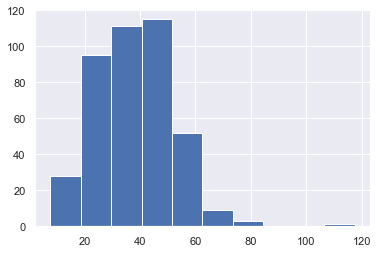

In [8]:
data['Price'].hist();

We can see that the target variable is normally distributed with some outliers.

In [9]:
# Taking a look at the outlier
outlier_price = data[data['Price']>100]
outlier_price

,Transaction Date,Age,Distance to station,Stores,Latitude,Longitude,Price
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5


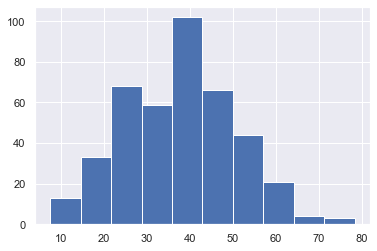

In [10]:
# This row here is the outlier. Hence, we remove the outlier

data.drop([270], inplace=True)
data.Price.hist()

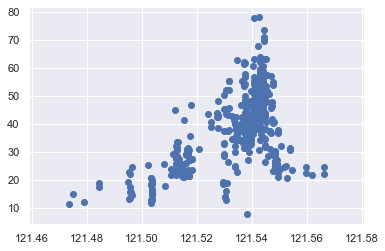

In [11]:
plt.scatter(data['Longitude'], data['Price']);

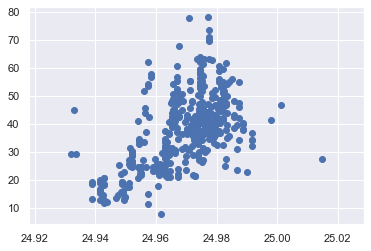

In [12]:
plt.scatter(data['Latitude'], data['Price']);

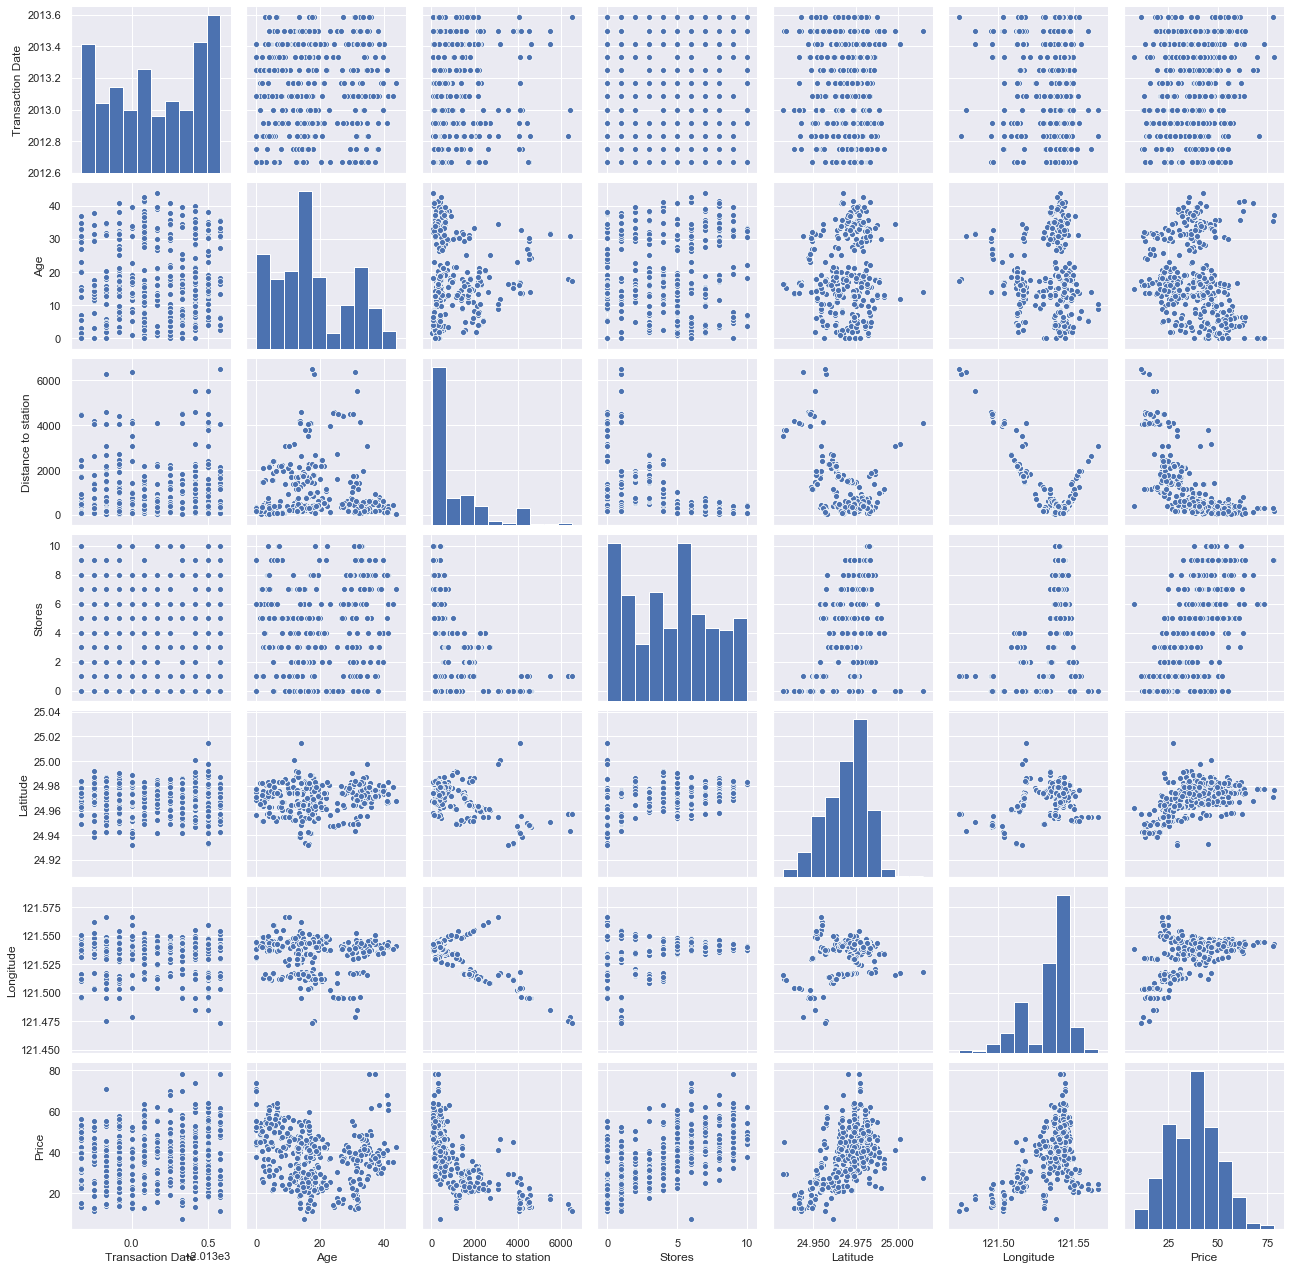

In [13]:
sns.pairplot(data);

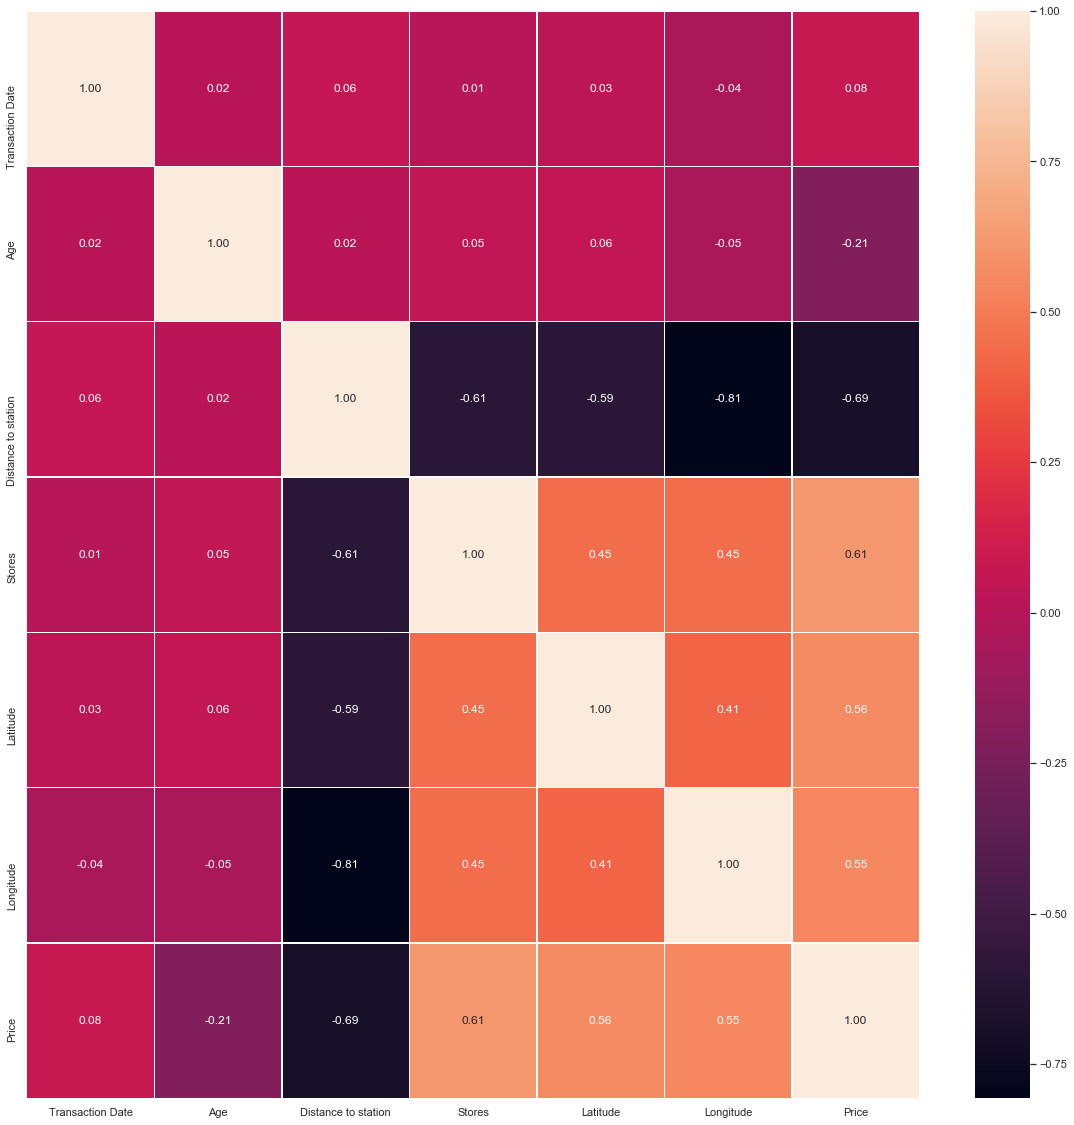

In [14]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax);

We observe no multicollinearity.

In [15]:
data

,Transaction Date,Age,Distance to station,Stores,Latitude,Longitude,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Transaction date is not needed as Age of the estate is sufficient.

In [16]:
checkpoint_1 = data.copy()

In [17]:
data.drop('Transaction Date', axis=1, inplace=True)

### Dealing with Latitude &  Longitude

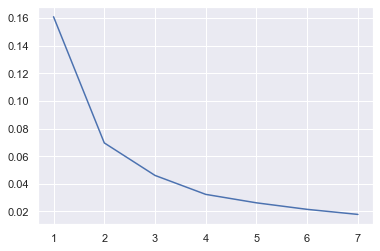

In [18]:
# We will convert them into clusters to show points close to each other

from sklearn.cluster import KMeans

dist=[]

# Plotting the elbow graph
for i in range(1,8):
    kmeans = KMeans(i).fit(data[['Latitude', 'Longitude']])
    wcss = kmeans.inertia_
    dist.append(wcss)

a = range(1,8)   

plt.plot(a, dist);

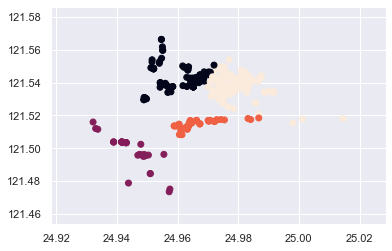

In [19]:
# K=4 is the appropriate cluster (Elbow Point)

kmeans = KMeans(4).fit(data[['Latitude', 'Longitude']])
cluster = kmeans.labels_

plt.scatter(data['Latitude'], data['Longitude'], c=cluster);

In [20]:
# We can now drop Latitude & Longitude columns from our dataset and instead add cluster column.

checkpoint_2 = data.copy()
data.drop(['Latitude', 'Longitude'], axis=1, inplace = True)
data['Location'] = cluster

data.head()

,Age,Distance to station,Stores,Price,Location
0,32.0,84.87882,10,37.9,3
1,19.5,306.59470,9,42.2,3
2,13.3,561.98450,5,47.3,3
3,13.3,561.98450,5,54.8,3
4,5.0,390.56840,5,43.1,3


In [22]:
# Let us see how well Location is correlated to Price

print('Correlation: ', data.corr().loc['Location','Price'])

Correlation:  0.35093668400078976


We can see that location is significantly impacting the dependent variable Price.

 ## Hence, our preprocessing is done

In [23]:
data.to_csv('Real_Estate_Preprocessed.csv', index=False)